# House Price Prediction

In [1]:
# Import required libraries 

import pandas as pd                                                          # Data Manipulation 
import numpy as np                                                           # Numeric Operation 
import matplotlib.pyplot as plt                                              # Data Visualization 
import seaborn as sns                                                        # Dada Visualization  
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder                              # For dummy variable creation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder                              # For dummy variable creation 
from sklearn.preprocessing import MinMaxScaler                               # For Scalling 

In [2]:
# Import Data set 

df = pd.read_csv("train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
# Displaying top10 rows
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
# Stasticall information 
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df_2 = df.drop(['Id'],axis=1)

In [9]:
df_2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [10]:
# # Segregation of Input and Output variable 
Input_X = pd.DataFrame(df_2,columns=[ 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'])
Output_Y = pd.DataFrame(df_2, columns=['SalePrice'])

In [11]:
# Segregation of input variable into Numeric and Category features 
Input_Numeric = Input_X.select_dtypes(include=['number'])
Input_Category = Input_X.select_dtypes(exclude=['number'])

In [12]:
# Segregating Numeric features
numeric_features = Input_Numeric.select_dtypes(exclude = ['object']).columns
print(numeric_features)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [13]:
#Segregating Categoric features
categoric_features = Input_Category.select_dtypes(include = ['object']).columns
categoric_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### **Expolratory Data analysis (EDA) / Descriptive Statistics**

#### 1st Moment Business Decision (Measures of Central Tendency)¶
1.Mean

2.Median

3.Mode

In [14]:
# Mean:: average value of dataset
mean = Input_Numeric.mean()
print(mean)

MSSubClass          56.897260
LotFrontage         70.049958
LotArea          10516.828082
OverallQual          6.099315
OverallCond          5.575342
YearBuilt         1971.267808
YearRemodAdd      1984.865753
MasVnrArea         103.685262
BsmtFinSF1         443.639726
BsmtFinSF2          46.549315
BsmtUnfSF          567.240411
TotalBsmtSF       1057.429452
1stFlrSF          1162.626712
2ndFlrSF           346.992466
LowQualFinSF         5.844521
GrLivArea         1515.463699
BsmtFullBath         0.425342
BsmtHalfBath         0.057534
FullBath             1.565068
HalfBath             0.382877
BedroomAbvGr         2.866438
KitchenAbvGr         1.046575
TotRmsAbvGrd         6.517808
Fireplaces           0.613014
GarageYrBlt       1978.506164
GarageCars           1.767123
GarageArea         472.980137
WoodDeckSF          94.244521
OpenPorchSF         46.660274
EnclosedPorch       21.954110
3SsnPorch            3.409589
ScreenPorch         15.060959
PoolArea             2.758904
MiscVal   

In [15]:
#Median:: middle value of Dataset
median = Input_Numeric.median()
print(median)

MSSubClass         50.0
LotFrontage        69.0
LotArea          9478.5
OverallQual         6.0
OverallCond         5.0
YearBuilt        1973.0
YearRemodAdd     1994.0
MasVnrArea          0.0
BsmtFinSF1        383.5
BsmtFinSF2          0.0
BsmtUnfSF         477.5
TotalBsmtSF       991.5
1stFlrSF         1087.0
2ndFlrSF            0.0
LowQualFinSF        0.0
GrLivArea        1464.0
BsmtFullBath        0.0
BsmtHalfBath        0.0
FullBath            2.0
HalfBath            0.0
BedroomAbvGr        3.0
KitchenAbvGr        1.0
TotRmsAbvGrd        6.0
Fireplaces          1.0
GarageYrBlt      1980.0
GarageCars          2.0
GarageArea        480.0
WoodDeckSF          0.0
OpenPorchSF        25.0
EnclosedPorch       0.0
3SsnPorch           0.0
ScreenPorch         0.0
PoolArea            0.0
MiscVal             0.0
MoSold              6.0
YrSold           2008.0
dtype: float64


In [16]:
#Mode:: Values that appers most frequently 
most_repeated_values = {}

for column in Input_Numeric.columns:
    mode_values = Input_Numeric[column].mode().to_list()
    most_repeated_values[column] = mode_values

print("Most repeated values for each column:")
for column, values in most_repeated_values.items():
    print(f"{column}: {values}")

Most repeated values for each column:
MSSubClass: [20]
LotFrontage: [60.0]
LotArea: [7200]
OverallQual: [5]
OverallCond: [5]
YearBuilt: [2006]
YearRemodAdd: [1950]
MasVnrArea: [0.0]
BsmtFinSF1: [0]
BsmtFinSF2: [0]
BsmtUnfSF: [0]
TotalBsmtSF: [0]
1stFlrSF: [864]
2ndFlrSF: [0]
LowQualFinSF: [0]
GrLivArea: [864]
BsmtFullBath: [0]
BsmtHalfBath: [0]
FullBath: [2]
HalfBath: [0]
BedroomAbvGr: [3]
KitchenAbvGr: [1]
TotRmsAbvGrd: [6]
Fireplaces: [0]
GarageYrBlt: [2005.0]
GarageCars: [2]
GarageArea: [0]
WoodDeckSF: [0]
OpenPorchSF: [0]
EnclosedPorch: [0]
3SsnPorch: [0]
ScreenPorch: [0]
PoolArea: [0]
MiscVal: [0]
MoSold: [6]
YrSold: [2009]


### 2nd Moment Business Decision (Measures of Dispersion)
1.Variance

2.Standard deviation

In [17]:
# Variance:: Degree of data spread or dispersion 
var = Input_Numeric.var()
print(var)

MSSubClass       1.789338e+03
LotFrontage      5.897492e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.278497e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      6.095825e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea         1.614216e+03
MiscVal   

Variance measures how spread out the values are within each feature. Higher variances indicate greater variability in the data for that feature, while lower variances suggest that the data points are closer to the mean.

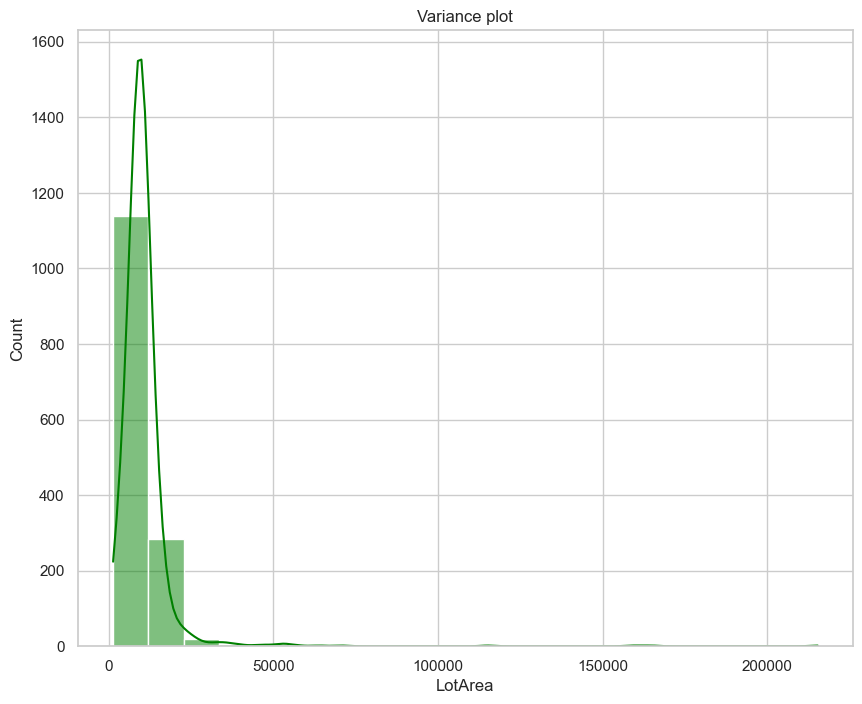

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
sns.histplot(data = Input_Numeric, x = 'LotArea', bins = 20, kde = True, color = 'green')
plt.title("Variance plot")
plt.show()

In [19]:
# Standard Deviation:: Square of variance, measure of how data points deviate from the mean
std = Input_Numeric.std()
print(std)

MSSubClass         42.300571
LotFrontage        24.284752
LotArea          9981.264932
OverallQual         1.382997
OverallCond         1.112799
YearBuilt          30.202904
YearRemodAdd       20.645407
MasVnrArea        181.066207
BsmtFinSF1        456.098091
BsmtFinSF2        161.319273
BsmtUnfSF         441.866955
TotalBsmtSF       438.705324
1stFlrSF          386.587738
2ndFlrSF          436.528436
LowQualFinSF       48.623081
GrLivArea         525.480383
BsmtFullBath        0.518911
BsmtHalfBath        0.238753
FullBath            0.550916
HalfBath            0.502885
BedroomAbvGr        0.815778
KitchenAbvGr        0.220338
TotRmsAbvGrd        1.625393
Fireplaces          0.644666
GarageYrBlt        24.689725
GarageCars          0.747315
GarageArea        213.804841
WoodDeckSF        125.338794
OpenPorchSF        66.256028
EnclosedPorch      61.119149
3SsnPorch          29.317331
ScreenPorch        55.757415
PoolArea           40.177307
MiscVal           496.123024
MoSold        

The standard deviation values show the magnitude of variation within each numeric feature

#### 3rd Business Moment Decision (Skewness)
Measure of asymmetry in the data distribution

In [20]:
skew = Input_Numeric.skew()
print(skew)

MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
dtype: float64


* A skewness value of 0 (or close to 0) suggests a relatively symmetric distribution.
* A positive skewness value indicates right skew (the tail is on the right). [ Mean > Mode ]
* A negative skewness value indicates left skew (the tail is on the left). [ Mode  > Mean ]

C:\Users\abhic\AppData\Local\Temp\ipykernel_13792\2093319955.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a, kde = True, bins = 30)


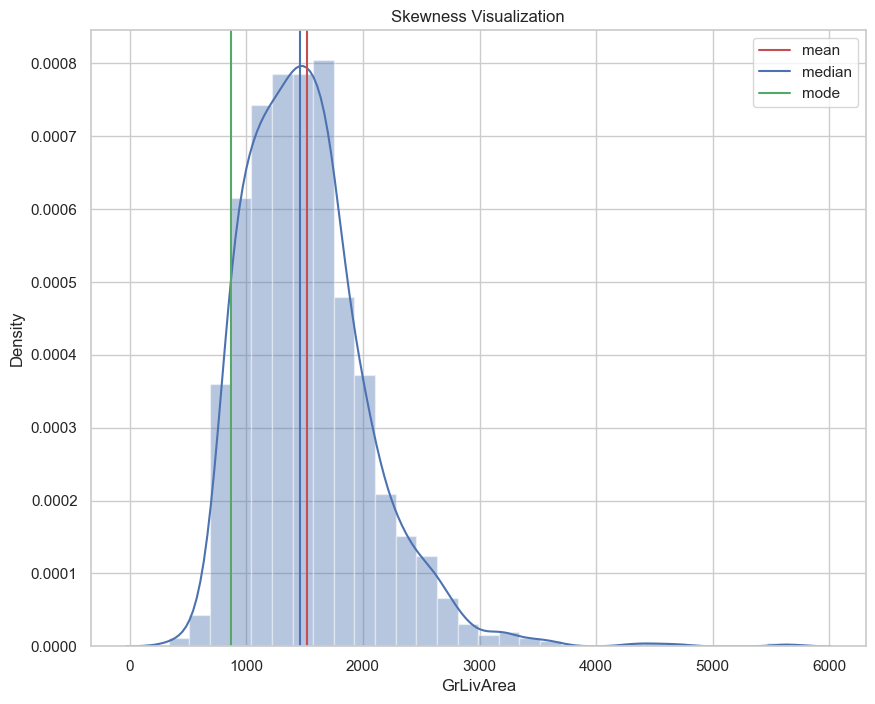

In [21]:
 # Defining the data
a = Input_Numeric['GrLivArea']

# Defining mean, median, mode
mean=a.mean()
median=a.median()
mode=a.mode()


plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
sns.distplot(a, kde = True, bins = 30)
plt.title("Skewness Visualization")
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode[0],color='g',label='mode')
plt.legend ()
plt.show()

#### 4th Business Moment Decision (Kurtosis)
Measure of peakedness - represents the overall spread in the data

In [22]:
kurt = Input_Numeric.kurt()
print(kurt)

MSSubClass         1.580188
LotFrontage       17.452867
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.082417
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.418341
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0.404109
YrSold            -1

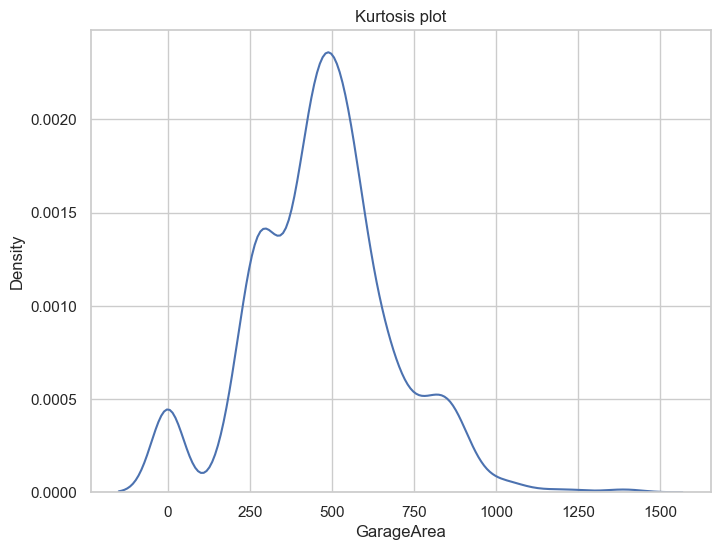

In [23]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x = 'GarageArea', data = Input_Numeric) 
plt.title("Kurtosis plot")
plt.show()

* Positive kurtosis values (excess kurtosis > 0) indicate a more peaked and heavy-tailed distribution.
* Negative kurtosis values (excess kurtosis < 0) indicate a flatter and lighter-tailed distribution.
* A kurtosis value of 0 (or close to 0) indicates a distribution with similar characteristics to a normal distribution.

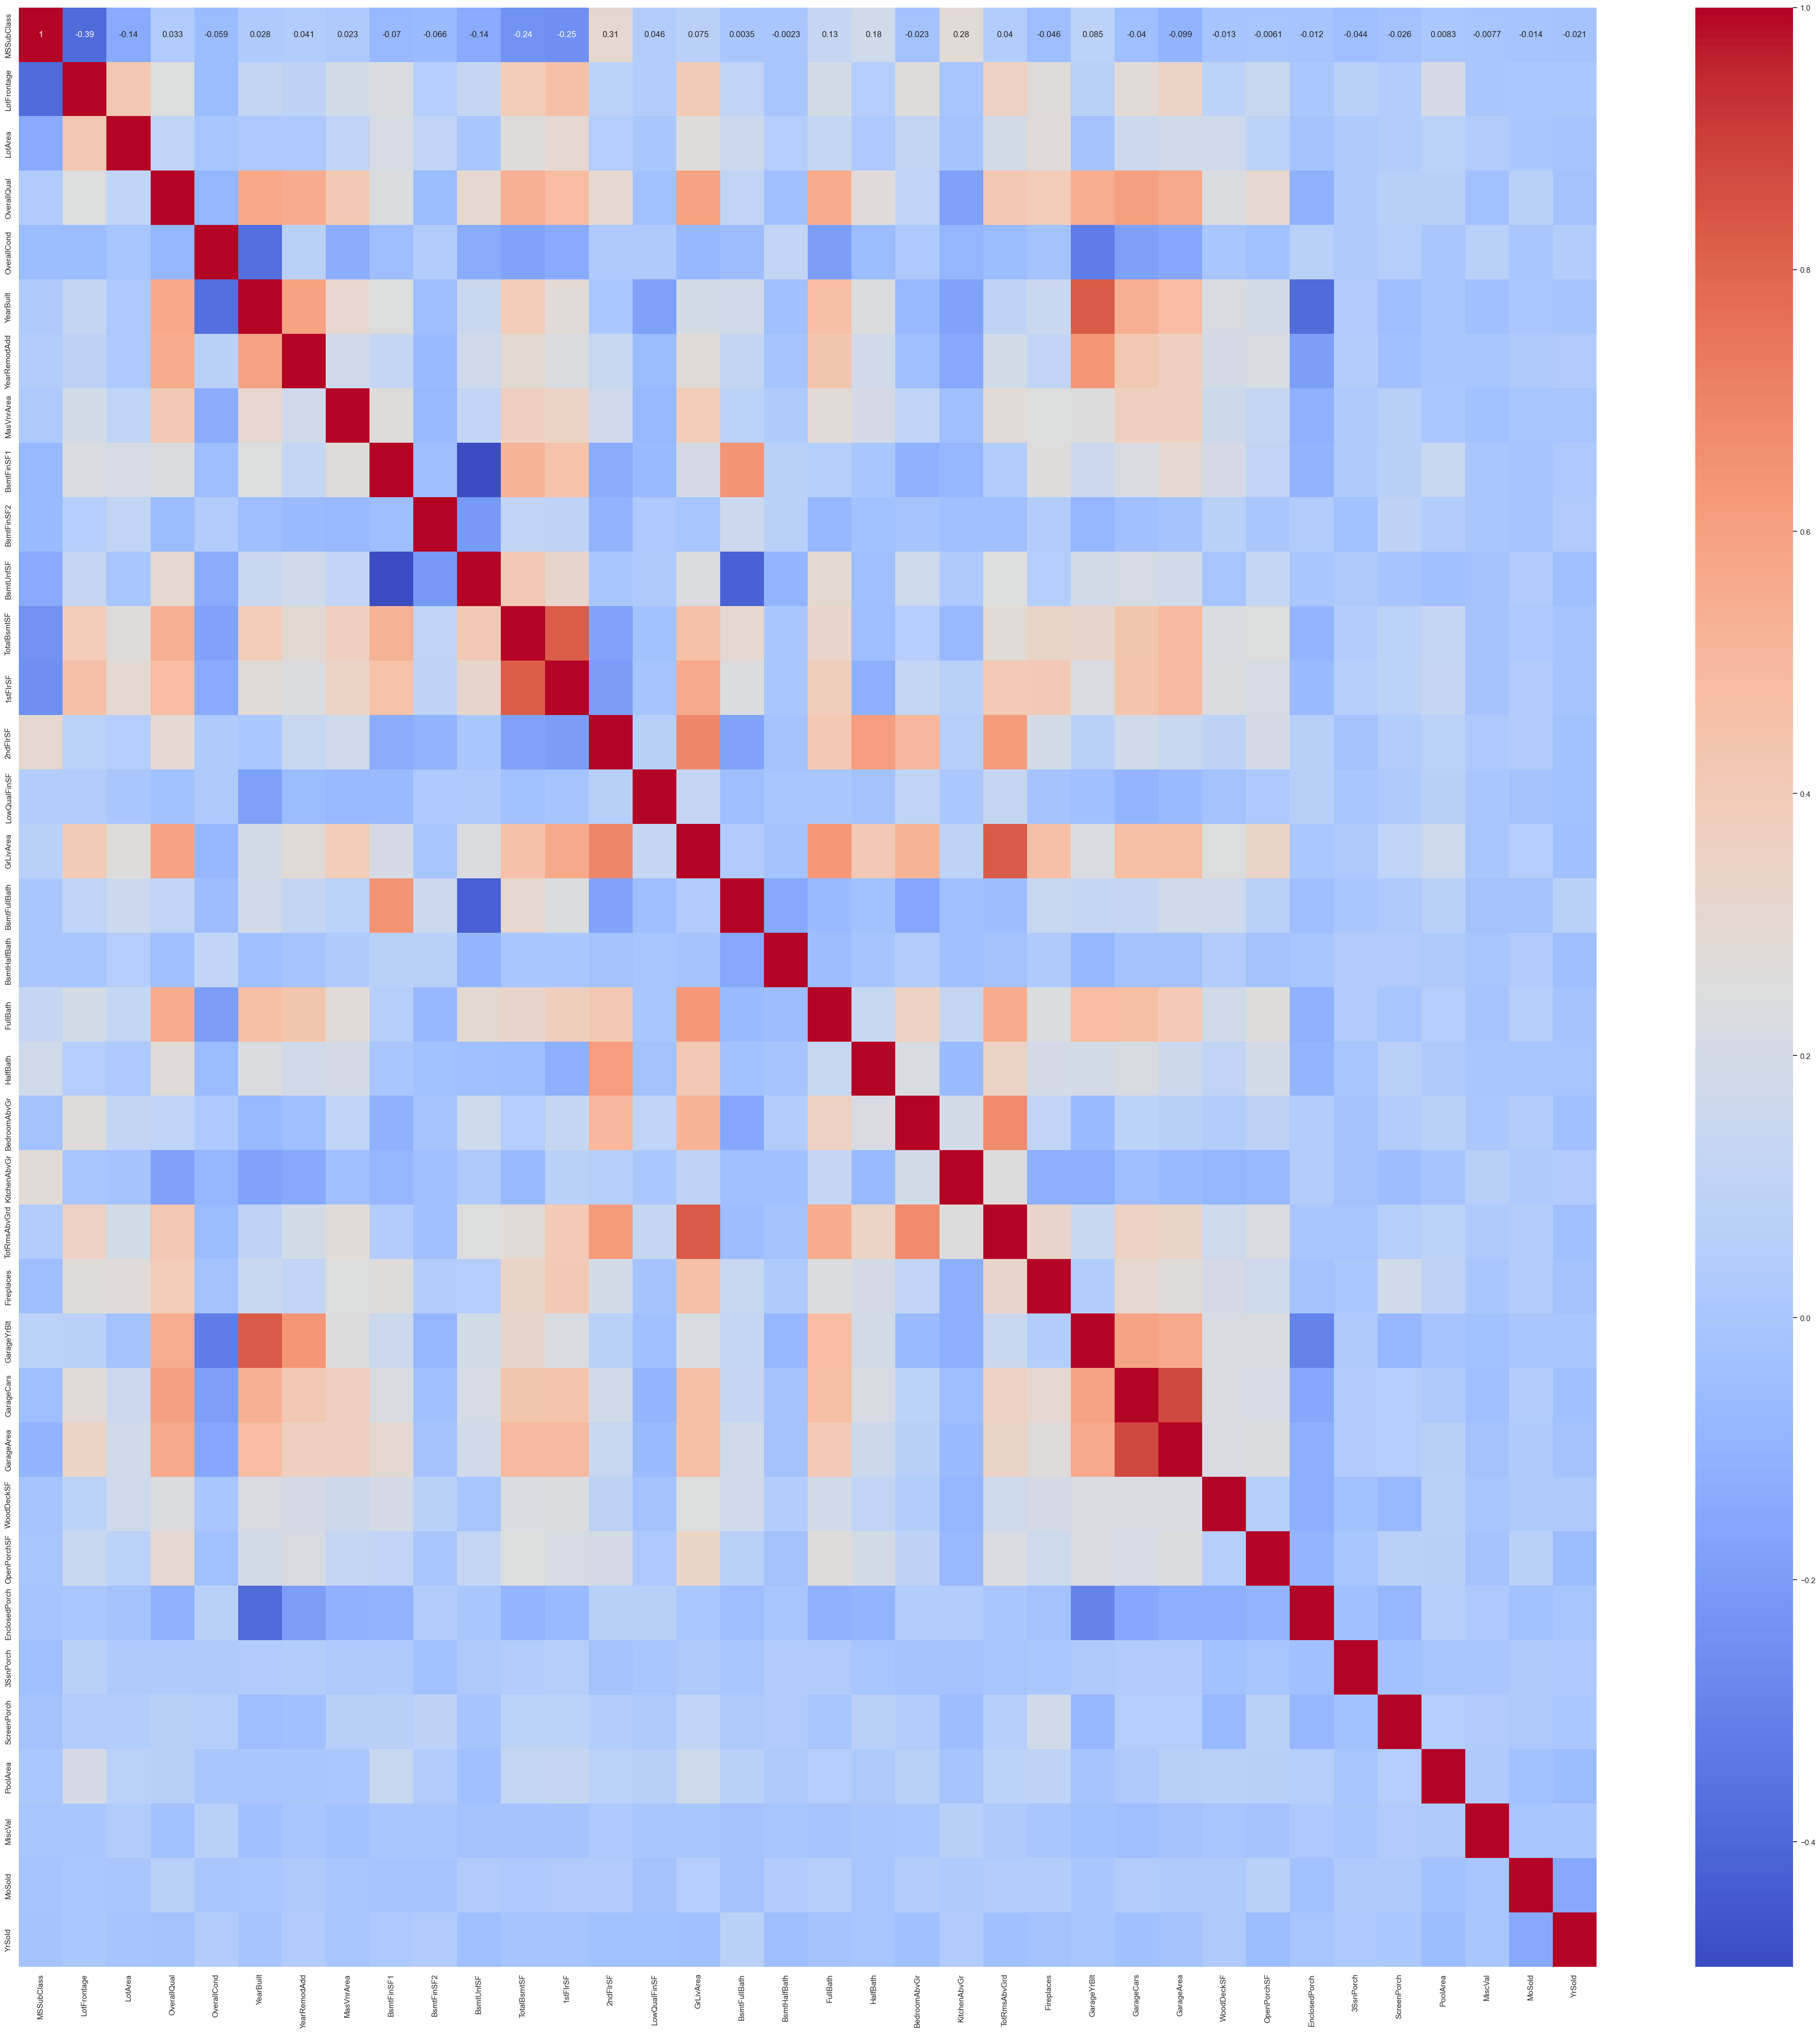

In [24]:
plt.figure(figsize=(50,50))
correlation_matrix = Input_Numeric.corr() 

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
 
# Show the plot
plt.show()

There is no correlation between the features 

# **Data Cleaning** 

## 1. Missing Value

In [25]:
# Numeric Values 

total_cell = len(Input_Numeric)

Missingg_Value_count = Input_Numeric.isnull().sum()

for col,values in Missingg_Value_count.items():
    print(col, ":" , (values/total_cell)*100,'%')

MSSubClass : 0.0 %
LotFrontage : 17.73972602739726 %
LotArea : 0.0 %
OverallQual : 0.0 %
OverallCond : 0.0 %
YearBuilt : 0.0 %
YearRemodAdd : 0.0 %
MasVnrArea : 0.547945205479452 %
BsmtFinSF1 : 0.0 %
BsmtFinSF2 : 0.0 %
BsmtUnfSF : 0.0 %
TotalBsmtSF : 0.0 %
1stFlrSF : 0.0 %
2ndFlrSF : 0.0 %
LowQualFinSF : 0.0 %
GrLivArea : 0.0 %
BsmtFullBath : 0.0 %
BsmtHalfBath : 0.0 %
FullBath : 0.0 %
HalfBath : 0.0 %
BedroomAbvGr : 0.0 %
KitchenAbvGr : 0.0 %
TotRmsAbvGrd : 0.0 %
Fireplaces : 0.0 %
GarageYrBlt : 5.5479452054794525 %
GarageCars : 0.0 %
GarageArea : 0.0 %
WoodDeckSF : 0.0 %
OpenPorchSF : 0.0 %
EnclosedPorch : 0.0 %
3SsnPorch : 0.0 %
ScreenPorch : 0.0 %
PoolArea : 0.0 %
MiscVal : 0.0 %
MoSold : 0.0 %
YrSold : 0.0 %


In [26]:
# Input_Category Values 

total_cell = len(Input_Category)

Missingg_Value_count = Input_Category.isnull().sum()

for col,values in Missingg_Value_count.items():
    print(col, ":" , (values/total_cell)*100,'%')

MSZoning : 0.0 %
Street : 0.0 %
Alley : 93.76712328767123 %
LotShape : 0.0 %
LandContour : 0.0 %
Utilities : 0.0 %
LotConfig : 0.0 %
LandSlope : 0.0 %
Neighborhood : 0.0 %
Condition1 : 0.0 %
Condition2 : 0.0 %
BldgType : 0.0 %
HouseStyle : 0.0 %
RoofStyle : 0.0 %
RoofMatl : 0.0 %
Exterior1st : 0.0 %
Exterior2nd : 0.0 %
MasVnrType : 0.547945205479452 %
ExterQual : 0.0 %
ExterCond : 0.0 %
Foundation : 0.0 %
BsmtQual : 2.5342465753424657 %
BsmtCond : 2.5342465753424657 %
BsmtExposure : 2.6027397260273974 %
BsmtFinType1 : 2.5342465753424657 %
BsmtFinType2 : 2.6027397260273974 %
Heating : 0.0 %
HeatingQC : 0.0 %
CentralAir : 0.0 %
Electrical : 0.0684931506849315 %
KitchenQual : 0.0 %
Functional : 0.0 %
FireplaceQu : 47.26027397260274 %
GarageType : 5.5479452054794525 %
GarageFinish : 5.5479452054794525 %
GarageQual : 5.5479452054794525 %
GarageCond : 5.5479452054794525 %
PavedDrive : 0.0 %
PoolQC : 99.52054794520548 %
Fence : 80.75342465753424 %
MiscFeature : 96.30136986301369 %
SaleType : 

We can below code also 

length = len(df)

null_values = df.isnull().sum()

percent = (null_values / length)*100

In [27]:
# Imputation for Numeric features 
Input_Numeric['LotFrontage'] = Input_Numeric['LotFrontage'].fillna(0)


median_GarageYrBlt = Input_Numeric['GarageYrBlt'].median()
Input_Numeric['GarageYrBlt'] = Input_Numeric['GarageYrBlt'].fillna(median_GarageYrBlt)

median_BltMasVnrArea = Input_Numeric['MasVnrArea'].median()
Input_Numeric['MasVnrArea'] = Input_Numeric['MasVnrArea'].fillna(median_BltMasVnrArea)

In [28]:
# Numeric Values 

total_cell = len(Input_Numeric)

Missingg_Value_count = Input_Numeric.isnull().sum()

for col,values in Missingg_Value_count.items():
    print(col, ":" , (values/total_cell)*100,'%')

MSSubClass : 0.0 %
LotFrontage : 0.0 %
LotArea : 0.0 %
OverallQual : 0.0 %
OverallCond : 0.0 %
YearBuilt : 0.0 %
YearRemodAdd : 0.0 %
MasVnrArea : 0.0 %
BsmtFinSF1 : 0.0 %
BsmtFinSF2 : 0.0 %
BsmtUnfSF : 0.0 %
TotalBsmtSF : 0.0 %
1stFlrSF : 0.0 %
2ndFlrSF : 0.0 %
LowQualFinSF : 0.0 %
GrLivArea : 0.0 %
BsmtFullBath : 0.0 %
BsmtHalfBath : 0.0 %
FullBath : 0.0 %
HalfBath : 0.0 %
BedroomAbvGr : 0.0 %
KitchenAbvGr : 0.0 %
TotRmsAbvGrd : 0.0 %
Fireplaces : 0.0 %
GarageYrBlt : 0.0 %
GarageCars : 0.0 %
GarageArea : 0.0 %
WoodDeckSF : 0.0 %
OpenPorchSF : 0.0 %
EnclosedPorch : 0.0 %
3SsnPorch : 0.0 %
ScreenPorch : 0.0 %
PoolArea : 0.0 %
MiscVal : 0.0 %
MoSold : 0.0 %
YrSold : 0.0 %


In [29]:
columns_to_fill_no = ['MiscFeature', 'Fence', 'PoolQC', 'GarageCond', 'GarageQual', 
                       'GarageFinish', 'GarageType', 'FireplaceQu', 'BsmtFinType2',
                       'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'Alley']

Input_Category[columns_to_fill_no] = Input_Category[columns_to_fill_no].fillna('No')

Input_Category['MasVnrType'] = Input_Category['MasVnrType'].fillna(Input_Category['MasVnrType'].mode()[0])
Input_Category['Electrical'] = Input_Category['Electrical'].fillna(Input_Category['Electrical'].mode()[0])

In [30]:
# Input_Category Values 

total_cell = len(Input_Category)

Missingg_Value_count = Input_Category.isnull().sum()

for col,values in Missingg_Value_count.items():
    print(col, ":" , (values/total_cell)*100,'%')

MSZoning : 0.0 %
Street : 0.0 %
Alley : 0.0 %
LotShape : 0.0 %
LandContour : 0.0 %
Utilities : 0.0 %
LotConfig : 0.0 %
LandSlope : 0.0 %
Neighborhood : 0.0 %
Condition1 : 0.0 %
Condition2 : 0.0 %
BldgType : 0.0 %
HouseStyle : 0.0 %
RoofStyle : 0.0 %
RoofMatl : 0.0 %
Exterior1st : 0.0 %
Exterior2nd : 0.0 %
MasVnrType : 0.0 %
ExterQual : 0.0 %
ExterCond : 0.0 %
Foundation : 0.0 %
BsmtQual : 0.0 %
BsmtCond : 0.0 %
BsmtExposure : 0.0 %
BsmtFinType1 : 0.0 %
BsmtFinType2 : 0.0 %
Heating : 0.0 %
HeatingQC : 0.0 %
CentralAir : 0.0 %
Electrical : 0.0 %
KitchenQual : 0.0 %
Functional : 0.0 %
FireplaceQu : 0.0 %
GarageType : 0.0 %
GarageFinish : 0.0 %
GarageQual : 0.0 %
GarageCond : 0.0 %
PavedDrive : 0.0 %
PoolQC : 0.0 %
Fence : 0.0 %
MiscFeature : 0.0 %
SaleType : 0.0 %
SaleCondition : 0.0 %


**2.Check For Duplicates**

In [31]:
Input_X.duplicated().sum()

0

There are No Duplicate Values

**3.Ordinal Encoding**

In [32]:
encoding_pipeline = Pipeline([('onehot', OrdinalEncoder())])    # Creating OrdinalEncoder PIpeline 

In [33]:
preprocess_pipeline = ColumnTransformer([('categorical', encoding_pipeline, categoric_features)])  # Transforning column

In [34]:
clean =  preprocess_pipeline.fit(Input_Category)   # Fiting and Tranforming the data

In [35]:
encode_data = pd.DataFrame(clean.transform(Input_Category))  # Creating data frame 

In [36]:
# To get feature names for Categorical columns after Onehotencoding 
encode_data.columns = clean.get_feature_names_out(input_features = Input_Category.columns)
encode_data.head()

,categorical__MSZoning,categorical__Street,categorical__Alley,categorical__LotShape,categorical__LandContour,categorical__Utilities,categorical__LotConfig,categorical__LandSlope,categorical__Neighborhood,categorical__Condition1,...,categorical__GarageType,categorical__GarageFinish,categorical__GarageQual,categorical__GarageCond,categorical__PavedDrive,categorical__PoolQC,categorical__Fence,categorical__MiscFeature,categorical__SaleType,categorical__SaleCondition
0,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,3.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,3.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,3.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,3.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


**4.Feature Scaling** 

In [37]:
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

In [38]:
scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)]) # Skips the transformations for remaining columns

In [39]:
scale = scale_columntransfer.fit(Input_Numeric)
scale

ColumnTransformer(transformers=[('scale',
                                 Pipeline(steps=[('scale', MinMaxScaler())]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])

In [40]:
scaled_data = pd.DataFrame(scale.transform(Input_Numeric), columns = numeric_features)
scaled_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.217043,0.184100,0.043080,0.566591,0.571918,0.719332,0.581096,0.064448,0.078604,0.031580,...,0.333554,0.109970,0.085302,0.039772,0.006712,0.031377,0.003738,0.002806,0.483811,0.453938
std,0.248827,0.110749,0.046653,0.153666,0.139100,0.218862,0.344090,0.112957,0.080811,0.109443,...,0.150779,0.146253,0.121126,0.110723,0.057711,0.116161,0.054441,0.032008,0.245784,0.332024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.134185,0.029229,0.444444,0.500000,0.594203,0.283333,0.000000,0.000000,0.000000,...,0.235896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000
50%,0.176471,0.201278,0.038227,0.555556,0.500000,0.731884,0.733333,0.000000,0.067948,0.000000,...,0.338505,0.000000,0.045704,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000
75%,0.294118,0.252396,0.048150,0.666667,0.625000,0.927536,0.900000,0.102656,0.126196,0.000000,...,0.406206,0.196033,0.124314,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# Concating the Scaled data and encoded data 
clean_data = pd.concat([scaled_data, encode_data], axis = 1)  # concatenated data will have new sequential index
clean_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,categorical__GarageType,categorical__GarageFinish,categorical__GarageQual,categorical__GarageCond,categorical__PavedDrive,categorical__PoolQC,categorical__Fence,categorical__MiscFeature,categorical__SaleType,categorical__SaleCondition
0,0.235294,0.207668,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,0.000000,0.255591,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,0.235294,0.217252,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,0.294118,0.191693,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,0.235294,0.268371,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


**Model Buliding**

Spliting data into Train and Test Data 

In [42]:
clean_data.shape

(1460, 79)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_data, Output_Y, test_size=0.2, random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 79)
(292, 79)
(1168, 1)
(292, 1)


**Linear Regression**

In [45]:
# Importing Linear Regression Model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [46]:
# Fiting the X_train and Y_train Data 
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predicting on X_test data  
y_pred = model.predict(X_test)

In [48]:
y_pred_flat = y_pred.flatten()

In [49]:

# Checking MSE
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1172115745.8567564


In [50]:
# Checking R^2 Value
r_squared = model.score(X_test, y_test) 
print(f"R-squared: {r_squared}")

R-squared: 0.8471882793252679


In [51]:
y_test = np.squeeze(y_test)
y_pred = np.squeeze(y_pred)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df

,Actual,Predicted
892,154500,150504.102827
1105,325000,311888.881236
413,115000,108325.470614
522,159000,176444.262288
1036,315500,316691.030355
...,...,...
479,89471,130091.714228
1361,260000,276439.069913
802,189000,216998.445419
651,108000,120772.422034


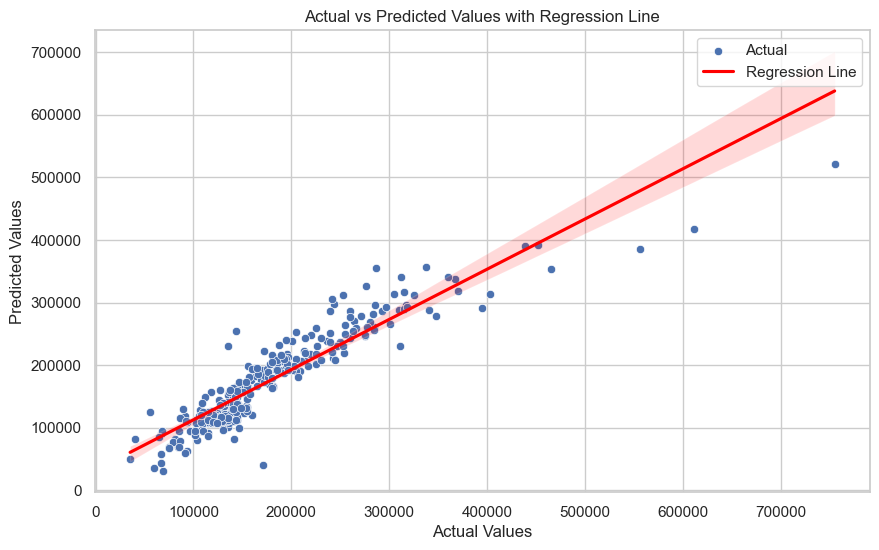

In [52]:
# Scatter plot of actual vs predicted values with regression line
plt.figure(figsize=(10, 6))

# Scatter plot for actual values
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df, label='Actual', marker='o')

# Regression line
sns.regplot(x='Actual', y='Predicted', data=comparison_df, scatter=False, line_kws={'color': 'red'}, label='Regression Line')

plt.title('Actual vs Predicted Values with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


**XGBoost (eXtreme Gradient Boosting)**

In [53]:
!pip install xgboost

In [54]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error 

In [55]:
xgb_model = XGBRegressor()  # Adjust parameters as needed

In [56]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [57]:
y_pred_xgb = xgb_model.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score


mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression:")
print(f'Mean Squared Error: {mse_xgb}')
print(f'R-squared: {r2_xgb}')

XGBoost Regression:
Mean Squared Error: 698093304.1250801
R-squared: 0.9089877946167447


### Let's Predict on Test Data 

In [59]:
import pandas as pd

In [60]:
test = pd.read_csv("test.csv")

In [61]:
test.shape

(1459, 80)

In [62]:
test_1 = test.drop(['Id'],axis=1)

In [63]:
test_1.shape

(1459, 79)

In [64]:
# # Segregation of Input and Output variable 
test_X = pd.DataFrame(test_1,columns=[ 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'])
test_Y = pd.DataFrame(test_1, columns=['SalePrice'])

In [65]:
test_X.shape

(1459, 79)

In [66]:
# Segregation of input variable into Numeric and Category features 
test_Numeric = test_X.select_dtypes(include=['number'])
test_Category = test_X.select_dtypes(exclude=['number'])

In [67]:
# Segregating Numeric features
test_numeric_features = test_Numeric.select_dtypes(exclude = ['object']).columns
test_numeric_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [68]:
#Segregating Categoric features
test_categoric_features = test_Category.select_dtypes(include = ['object']).columns
test_categoric_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [69]:
# Imputation for Numeric features 
test_Numeric['LotFrontage'] = test_Numeric['LotFrontage'].fillna(0)
test_Numeric['BsmtFinSF1'] = test_Numeric['BsmtFinSF1'].fillna(0)
test_Numeric['BsmtFinSF2'] = test_Numeric['BsmtFinSF2'].fillna(0)
test_Numeric['BsmtUnfSF'] = test_Numeric['BsmtUnfSF'].fillna(0)
test_Numeric['BsmtFullBath'] = test_Numeric['BsmtFullBath'].fillna(0)
test_Numeric['BsmtHalfBath'] = test_Numeric['BsmtHalfBath'].fillna(0)
test_Numeric['GarageCars'] = test_Numeric['GarageCars'].fillna(0)
test_Numeric['GarageArea'] = test_Numeric['GarageArea'].fillna(0)
test_Numeric['GarageArea'] = test_Numeric['GarageArea'].fillna(0)


median_GarageYrBlt = test_Numeric['GarageYrBlt'].median() 
test_Numeric['GarageYrBlt'] = test_Numeric['GarageYrBlt'].fillna(median_GarageYrBlt)

median_BltMasVnrArea = test_Numeric['MasVnrArea'].median()
test_Numeric['MasVnrArea'] = test_Numeric['MasVnrArea'].fillna(median_BltMasVnrArea)

In [70]:
columns_to_fill_no = ['MiscFeature', 'Fence', 'PoolQC', 'GarageCond', 'GarageQual', 
                       'GarageFinish', 'GarageType', 'FireplaceQu', 'BsmtFinType2',
                       'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'Alley','MSZoning',
                     'Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType']

test_Category[columns_to_fill_no] = test_Category[columns_to_fill_no].fillna('No')

test_Category['MasVnrType'] = test_Category['MasVnrType'].fillna(test_Category['MasVnrType'].mode()[0])
test_Category['Electrical'] = test_Category['Electrical'].fillna(test_Category['Electrical'].mode()[0])

In [71]:
encoding_pipeline = Pipeline([('onehot', OrdinalEncoder())])    # Creating OrdinalEncoder PIpeline 

In [72]:
preprocess_pipeline = ColumnTransformer([('categorical', encoding_pipeline, test_categoric_features)])  # Transforning column

In [73]:
clean =  preprocess_pipeline.fit(test_Category)   # Fiting and Tranforming the data

In [74]:
encode_data = pd.DataFrame(clean.transform(test_Category))  # Creating data frame 

In [75]:
# To get feature names for Categorical columns after Onehotencoding 
encode_data.columns = clean.get_feature_names_out(input_features = test_Category.columns)

In [76]:
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

In [77]:
scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, test_numeric_features)]) # Skips the transformations for remaining columns

In [78]:
scale = scale_columntransfer.fit(test_Numeric)

In [79]:
scaled_data = pd.DataFrame(scale.transform(test_Numeric), columns = test_numeric_features)

In [80]:
# Concating the Scaled data and encoded data 
test_clean_data = pd.concat([scaled_data, encode_data], axis = 1)  # concatenated data will have new sequential index

In [82]:
test_clean_data['TotalBsmtSF'] = test_clean_data['TotalBsmtSF'].fillna(0)


In [84]:
y_pred_xgb_test = xgb_model.predict(test_clean_data)

In [92]:
test_clean_data.shape

(1459, 79)

In [96]:
output = pd.DataFrame(data={'Id' : test.Id,'SalePrice' : y_pred_xgb_test})
output.to_csv('submission.csv', index=False)

In [97]:
output.shape

(1459, 2)

In [98]:
import os
os.getcwd()

'C:\\Users\\abhic\\Desktop\\Kaggle Compitation'